In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#% matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

df_08 = pd.read_csv('all_alpha_08.csv') 
df_08.head(5)

,Model,Displ,Cyl,Trans,Drive,Fuel,Sales Area,Stnd,Underhood ID,Veh Class,Air Pollution Score,FE Calc Appr,City MPG,Hwy MPG,Cmb MPG,Unadj Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXT03.7PKR,SUV,7,Drv,15,20,17,22.0527,4,no
1,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,FA,B5,8HNXT03.7PKR,SUV,6,Drv,15,20,17,22.0527,4,no
2,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXT02.3DKR,SUV,7,Drv,17,22,19,24.1745,5,no
3,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,FA,B5,8HNXT02.3DKR,SUV,6,Drv,17,22,19,24.1745,5,no
4,ACURA RL,3.5,(6 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXV03.5HKR,midsize car,7,Drv,16,24,19,24.5629,5,no


In [9]:
df_18 = pd.read_csv('all_alpha_18.csv') 
df_18.head(5)

,Model,Displ,Cyl,Trans,Drive,Fuel,Cert Region,Stnd,Stnd Description,Underhood ID,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay,Comb CO2
0,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,FA,T3B125,Federal Tier 3 Bin 125,JHNXT03.5GV3,small SUV,3,20,28,23,5,No,386
1,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,CA,U2,California LEV-II ULEV,JHNXT03.5GV3,small SUV,3,20,28,23,5,No,386
2,ACURA RDX,3.5,6.0,SemiAuto-6,4WD,Gasoline,FA,T3B125,Federal Tier 3 Bin 125,JHNXT03.5GV3,small SUV,3,19,27,22,4,No,402
3,ACURA RDX,3.5,6.0,SemiAuto-6,4WD,Gasoline,CA,U2,California LEV-II ULEV,JHNXT03.5GV3,small SUV,3,19,27,22,4,No,402
4,ACURA TLX,2.4,4.0,AMS-8,2WD,Gasoline,CA,L3ULEV125,California LEV-III ULEV125,JHNXV02.4WH3,small car,3,23,33,27,6,No,330


In [10]:
df_18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1611 entries, 0 to 1610
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 1611 non-null   object 
 1   Displ                 1609 non-null   float64
 2   Cyl                   1609 non-null   float64
 3   Trans                 1611 non-null   object 
 4   Drive                 1611 non-null   object 
 5   Fuel                  1611 non-null   object 
 6   Cert Region           1611 non-null   object 
 7   Stnd                  1611 non-null   object 
 8   Stnd Description      1611 non-null   object 
 9   Underhood ID          1611 non-null   object 
 10  Veh Class             1611 non-null   object 
 11  Air Pollution Score   1611 non-null   int64  
 12  City MPG              1611 non-null   object 
 13  Hwy MPG               1611 non-null   object 
 14  Cmb MPG               1611 non-null   object 
 15  Greenhouse Gas Score 

In [11]:
df_08.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2404 entries, 0 to 2403
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 2404 non-null   object 
 1   Displ                 2404 non-null   float64
 2   Cyl                   2205 non-null   object 
 3   Trans                 2205 non-null   object 
 4   Drive                 2311 non-null   object 
 5   Fuel                  2404 non-null   object 
 6   Sales Area            2404 non-null   object 
 7   Stnd                  2404 non-null   object 
 8   Underhood ID          2404 non-null   object 
 9   Veh Class             2404 non-null   object 
 10  Air Pollution Score   2404 non-null   object 
 11  FE Calc Appr          2205 non-null   object 
 12  City MPG              2205 non-null   object 
 13  Hwy MPG               2205 non-null   object 
 14  Cmb MPG               2205 non-null   object 
 15  Unadj Cmb MPG        

In [12]:
sum(df_08.duplicated()) 


25

In [13]:
df_08.isna().Cyl.sum()

199

In [14]:
sum(df_18.duplicated())

0

In [15]:
df_18['Fuel'].unique()

array(['Gasoline', 'Gasoline/Electricity', 'Diesel', 'Ethanol/Gas',
       'Electricity'], dtype=object)

In [16]:
df_08['Fuel'].unique()

array(['Gasoline', 'ethanol/gas', 'ethanol', 'diesel', 'CNG'],
      dtype=object)

# Drop extraneous columns

In [113]:
df_08.head(1)

,model,displ,cyl,trans,drive,fuel,stnd,underhood_id,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol,L2,8MBXV03.0U2A,small car,6,13,19,15,7,no


In [100]:
# drop columns from 2018 dataset
#df_18.drop([ 'Stnd Description','Comb CO2'], axis=1, inplace=True)
df_08.drop([ 'fe_calc_appr','unadj_cmb_mpg'], axis=1, inplace=True)
# confirm changes
df_18.head(1)

,model,displ,cyl,trans,drive,fuel,stnd,underhood_id,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA RDX,3.5,6,SemiAuto-6,2WD,Gasoline,U2,JHNXT03.5GV3,small SUV,3.0,20,28,23,5,No


### Rename Columns

In [110]:
# rename Sales Area to Cert Region
df_08.rename(columns={'Sales Area':'Cert Region' } ,inplace=True)

# confirm changes
df_08.head()

,model,displ,cyl,trans,drive,fuel,stnd,underhood_id,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol,L2,8MBXV03.0U2A,small car,6,13,19,15,7,no
1,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,gas,L2,8MBXV03.0U2A,small car,4,18,25,21,6,no
2,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,U2,8HNXT03.7PKR,SUV,7,15,20,17,4,no
3,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,U2,8HNXT02.3DKR,SUV,7,17,22,19,5,no
4,ACURA RL,3.5,6,Auto-S5,4WD,Gasoline,U2,8HNXV03.5HKR,midsize car,7,16,24,19,5,no


In [102]:
# replace spaces with underscores and lowercase labels for 2008 dataset
df_08.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)

# confirm changes
df_08.head(1)

,model,displ,cyl,trans,drive,fuel,stnd,underhood_id,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol,L2,8MBXV03.0U2A,small car,6,13,19,15,7,no


In [103]:
# replace spaces with underscores and lowercase labels for 2018 dataset
df_18.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)

# confirm changes
df_18.head(1)

,model,displ,cyl,trans,drive,fuel,stnd,underhood_id,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA RDX,3.5,6,SemiAuto-6,2WD,Gasoline,U2,JHNXT03.5GV3,small SUV,3.0,20,28,23,5,No


In [104]:
# confirm column labels for 2008 and 2018 datasets are identical
df_08.columns == df_18.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

In [112]:
# make sure they're all identical like this
(df_08.columns == df_18.columns).all()


True

# 1. Filter
 ## For consistency, only compare cars certified by California standards 
 #### so I select only rows where cert_region is CA

In [106]:
df_08=df_08.query('cert_region == "CA"')
df_18=df_18.query('cert_region == "CA"')

UndefinedVariableError: name 'cert_region' is not defined

In [107]:
# confirm only certification region is California
df_08['cert_region'].unique()

KeyError: 'cert_region'

In [25]:
# confirm only certification region is California
df_18['cert_region'].unique()

array(['CA'], dtype=object)

### drop the cert_region columns, since it will no longer provide any useful information

In [26]:
# drop certification region columns form both datasets
df_08.drop('cert_region', axis=1, inplace=True)
df_18.drop('cert_region', axis=1, inplace=True)

In [114]:
df_18.head(1)

,model,displ,cyl,trans,drive,fuel,stnd,underhood_id,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA RDX,3.5,6,SemiAuto-6,2WD,Gasoline,U2,JHNXT03.5GV3,small SUV,3.0,20,28,23,5,No


In [115]:
df_08.shape , df_18.shape

((1008, 15), (872, 15))

## Drop any rows in both datasets that contain missing values.

In [116]:
# view missing value count for each feature in 2008
df_08.isnull().sum()

model                   0
displ                   0
cyl                     0
trans                   0
drive                   0
fuel                    0
stnd                    0
underhood_id            0
veh_class               0
air_pollution_score     0
city_mpg                0
hwy_mpg                 0
cmb_mpg                 0
greenhouse_gas_score    0
smartway                0
dtype: int64

In [117]:
# view missing value count for each feature in 2008
df_18.isnull().sum()

model                   0
displ                   0
cyl                     0
trans                   0
drive                   0
fuel                    0
stnd                    0
underhood_id            0
veh_class               0
air_pollution_score     0
city_mpg                0
hwy_mpg                 0
cmb_mpg                 0
greenhouse_gas_score    0
smartway                0
dtype: int64

In [118]:
# drop rows with any null values in both datasets
df_08.dropna(inplace=True)
df_18.dropna(inplace=True)

In [119]:
# checks if any of columns in 2008 have null values.
df_08.isnull().sum().any()

False

In [120]:
# checks if any of columns in 2008 have null values.
df_18.isnull().sum().any()

False

### Drop any duplicate rows in both datasets.

In [121]:
# print number of duplicates in 2008 and 2018 datasets
print(df_08.duplicated().sum())
print(df_18.duplicated().sum())

3
38


In [122]:
# drop duplicates in both datasets
df_08.drop_duplicates(inplace=True)
df_18.drop_duplicates(inplace=True)

In [123]:
 df_18.shape

(834, 15)

In [124]:
 df_08.shape

(1005, 15)

## Fix cyl datatype
### 2008: extract int from string.
### 2018: convert float to int.

In [125]:
# check value counts for the 2008 cyl column
df_08['cyl'].value_counts()

cyl
6     419
4     285
8     206
5      48
12     30
10     14
2       2
16      1
Name: count, dtype: int64

In [126]:
# Extract int from strings in the 2008 cyl column
df_08['cyl'] = df_08['cyl'].str.extract('(\\d+)').astype(int)

AttributeError: Can only use .str accessor with string values!

In [127]:
# Check value counts for 2008 cyl column again to confirm the change
df_08['cyl'].value_counts()

cyl
6     419
4     285
8     206
5      48
12     30
10     14
2       2
16      1
Name: count, dtype: int64

In [128]:
# convert 2018 cyl column to int
df_18['cyl'] = df_18['cyl'].astype(int)

## Fix air_pollution_score datatype
### 2008: convert string to float.
### 2018: convert int to float.

In [129]:
# convert 2008 air_pollution_score column to float
df_08['air_pollution_score']=df_08['air_pollution_score'].astype(float)

ValueError: could not convert string to float: '6/4'

## Figuring out the issue
### According to the error above, the air pollution score value in one of the rows is "6/4" - let's check it out.

In [130]:
df_08[df_08['air_pollution_score'] ==  '6/4' ]

,model,displ,cyl,trans,drive,fuel,stnd,underhood_id,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
594,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol/gas,L2,8MBXV03.0U2A,small car,6/4,13/18,19/25,15/21,7/6,no


#### It's not just the air pollution score!
#### The mpg columns and greenhouse gas scores also seem to have the same problem 
#### maybe that's why these were all saved as strings! According my investegations I found 
#### from the PDF documentation:

    "If a vehicle can operate on more than one type of fuel, an estimate is provided for each fuel type."
    
 so all vehicles with more than one fuel type, or hybrids, like the one above (it uses ethanol AND gas) will have a string that holds two values - one for each. 

In [147]:
# First, let's get all the hybrids in 2008
hb_08 = df_08[df_08['fuel'].str.contains('/')]
hb_08

,model,displ,cyl,trans,drive,fuel,stnd,underhood_id,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
594,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol/gas,L2,8MBXV03.0U2A,small car,6/4,13/18,19/25,15/21,7/6,no


In [148]:
# hybrids in 2018
hb_18 = df_18[df_18['fuel'].str.contains('/')]
hb_18.head(3)

,model,displ,cyl,trans,drive,fuel,stnd,underhood_id,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
53,BMW 330e,2.0,4,SemiAuto-8,2WD,Gasoline/Electricity,L3ULEV125,JBMXV02.0H48,small car,3.0,28/66,34/78,30/71,10,Yes
79,BMW 530e,2.0,4,SemiAuto-8,2WD,Gasoline/Electricity,L3SULEV30,JBMXV02.0H30,small car,7.0,27/70,31/75,29/72,10,Elite
80,BMW 530e,2.0,4,SemiAuto-8,4WD,Gasoline/Electricity,L3SULEV30,JBMXV02.0H30,small car,7.0,27/66,31/68,28/67,10,Elite


We're going to take each hybrid row and split them into two new rows - one with values for the first fuel type (values before the "/"), and the other with values for the second fuel type (values after the "/"). Let's separate them with two dataframes!

In [161]:
# create two copies of the 2008 hybrids dataframe
df1 = hb_08.copy()  # data on first fuel type of each hybrid vehicle
df2 = hb_08.copy()  # data on second fuel type of each hybrid vehicle

# Each one should look like this
df2

,model,displ,cyl,trans,drive,fuel,stnd,underhood_id,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
594,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol/gas,L2,8MBXV03.0U2A,small car,6/4,13/18,19/25,15/21,7/6,no


In [162]:
# columns to split by "/"
split_columns = ['fuel', 'air_pollution_score', 'city_mpg', 'hwy_mpg', 'cmb_mpg', 'greenhouse_gas_score']

# apply split function to each column of each dataframe copy
for c in split_columns:
    df1[c] = df1[c].apply(lambda x: x.split("/")[0])
    #df2[c] = df2[c].apply(lambda x: x.split("/")[1])
    df2[c] = df2[c].apply(lambda x: x.split("/")[1] if len(x.split("/")) > 1 else "")

In [163]:
# combine dataframes to add to the original dataframe
new_rows = pd.concat([df1, df2])

# now we have separate rows for each fuel type of each vehicle!
new_rows

,model,displ,cyl,trans,drive,fuel,stnd,underhood_id,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
594,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol,L2,8MBXV03.0U2A,small car,6,13,19,15,7,no
594,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,gas,L2,8MBXV03.0U2A,small car,4,18,25,21,6,no


In [209]:
# drop the original hybrid rows
df_08.drop(hb_08.index, inplace=True)

# add in our newly separated rows
df_08 = pd.concat([new_rows,df_08] , ignore_index=True) 


AttributeError: 'NoneType' object has no attribute 'drop'

In [208]:
# check that all the original hybrid rows with "/"s are gone
df_08[df_08['fuel'].str.contains('/')]

TypeError: 'NoneType' object is not subscriptable

In [207]:
#df_08.shape
#df_08=df_08.drop (index = 677, inplace=True) 
df_08[df_08['city_mpg'].str.contains('/')]

TypeError: 'NoneType' object is not subscriptable

## the same process for the 2018 dataset

In [139]:
# create two copies of the 2008 hybrids dataframe
df1_18 = hb_18.copy()  # data on first fuel type of each hybrid vehicle
df2_18 = hb_18.copy()  # data on second fuel type of each hybrid vehicle

# Each one should look like this
df1_18.head(2)

,model,displ,cyl,trans,drive,fuel,stnd,underhood_id,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
53,BMW 330e,2.0,4,SemiAuto-8,2WD,Gasoline/Electricity,L3ULEV125,JBMXV02.0H48,small car,3.0,28/66,34/78,30/71,10,Yes
79,BMW 530e,2.0,4,SemiAuto-8,2WD,Gasoline/Electricity,L3SULEV30,JBMXV02.0H30,small car,7.0,27/70,31/75,29/72,10,Elite


In [182]:
# list of columns to split
split_columns = ['fuel','city_mpg','hwy_mpg','cmb_mpg']

# apply split function to each column of each dataframe copy
for c in split_columns:
    df1_18[c] = df1_18[c].apply(lambda x: x.split("/")[0])
    df2_18[c] = df2_18[c].apply(lambda x: x.split("/")[0])                         

In [184]:
# append the two dataframes
new_rows = pd.concat([ df1_18,df2_18])

# drop each hybrid row from the original 2018 dataframe
# do this by using pandas' drop function with hb_18's index
df_18.drop(hb_18.index, inplace=True)

# append new_rows to df_18
df_18 = pd.concat([df_18,new_rows], ignore_index=True)

In [186]:
# check that all the original hybrid rows with "/"s are gone
df_18[df_18['fuel'].str.contains('/')]

,model,displ,cyl,trans,drive,fuel,stnd,underhood_id,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway


### Now we can  continue the changes needed for `air_pollution_score`:
- 2008: convert string to float
- 2018: convert int to float

In [187]:
# convert string to float for 2008 air pollution column
df_08['air_pollution_score']=df_08['air_pollution_score'].astype(float)

ValueError: could not convert string to float: '6/4'

In [188]:
# convert int to float for 2018 air pollution column
df_18['air_pollution_score']=df_18['air_pollution_score'].astype(float)

In [145]:
df_08.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   model                 1007 non-null   object 
 1   displ                 1007 non-null   float64
 2   cyl                   1007 non-null   int32  
 3   trans                 1007 non-null   object 
 4   drive                 1007 non-null   object 
 5   fuel                  1007 non-null   object 
 6   stnd                  1007 non-null   object 
 7   underhood_id          1007 non-null   object 
 8   veh_class             1007 non-null   object 
 9   air_pollution_score   1007 non-null   object 
 10  city_mpg              1007 non-null   object 
 11  hwy_mpg               1007 non-null   object 
 12  cmb_mpg               1007 non-null   object 
 13  greenhouse_gas_score  1007 non-null   object 
 14  smartway              1007 non-null   object 
dtypes: float64(1), int32(

In [146]:
df_08['city_mpg']=df_08['city_mpg'].astype(float)
df_08['hwy_mpg']=df_08['hwy_mpg'].astype(float)
df_08['cmb_mpg']=df_08['cmb_mpg'].astype(float)
df_08['greenhouse_gas_score']=df_08['greenhouse_gas_score'].astype(int)

ValueError: could not convert string to float: '13/18'

In [60]:
df_18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   model                 872 non-null    object 
 1   displ                 872 non-null    float64
 2   cyl                   872 non-null    int32  
 3   trans                 872 non-null    object 
 4   drive                 872 non-null    object 
 5   fuel                  872 non-null    object 
 6   stnd                  872 non-null    object 
 7   underhood_id          872 non-null    object 
 8   veh_class             872 non-null    object 
 9   air_pollution_score   872 non-null    float64
 10  city_mpg              872 non-null    object 
 11  hwy_mpg               872 non-null    object 
 12  cmb_mpg               872 non-null    object 
 13  greenhouse_gas_score  872 non-null    int64  
 14  smartway              872 non-null    object 
dtypes: float64(2), int32(1)

In [61]:
df_18['city_mpg']=df_18['city_mpg'].astype(float)
df_18['hwy_mpg']=df_18['hwy_mpg'].astype(float)
df_18['cmb_mpg']=df_18['cmb_mpg'].astype(float)

ValueError: could not convert string to float: '28/66'

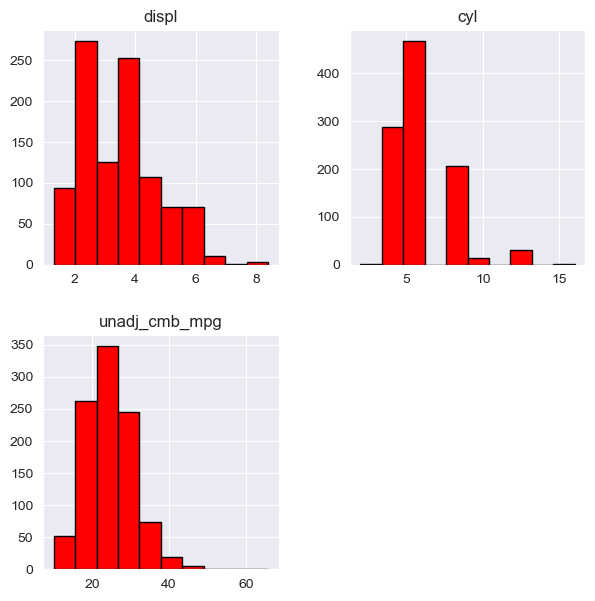

In [62]:
df_08.hist(figsize=(7,7), edgecolor='black',color = 'red');

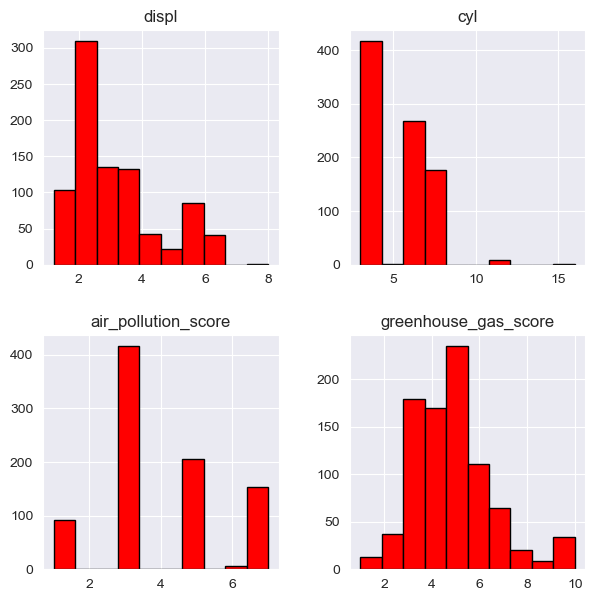

In [63]:
df_18.hist(figsize=(7,7), edgecolor='black',color = 'red');

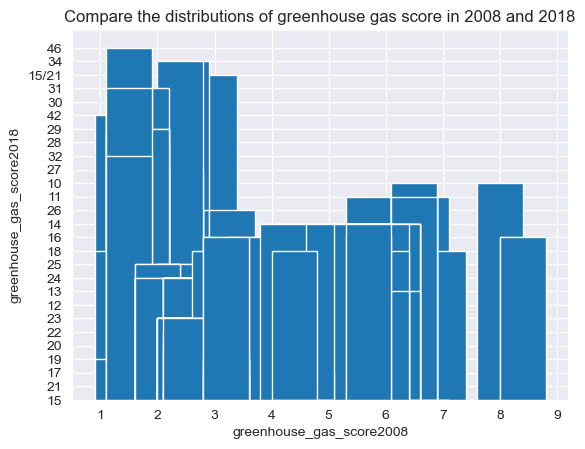

In [64]:
displa=df_08['displ']
mpg = df_08['cmb_mpg']
plt.bar(displa,mpg  )
plt.title('Compare the distributions of greenhouse gas score in 2008 and 2018')
plt.xlabel('greenhouse_gas_score2008')
plt.ylabel('greenhouse_gas_score2018');

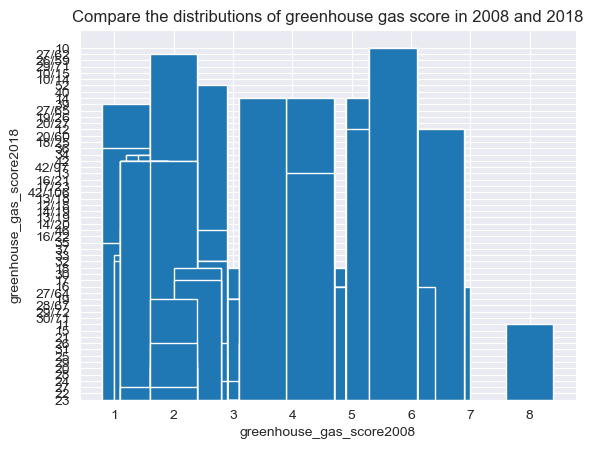

In [87]:
displa=df_18['displ']
mpg = df_18['cmb_mpg']
plt.bar(displa,mpg)
plt.title('Compare the distributions of greenhouse gas score in 2008 and 2018')
plt.xlabel('greenhouse_gas_score2008')
plt.ylabel('greenhouse_gas_score2018');



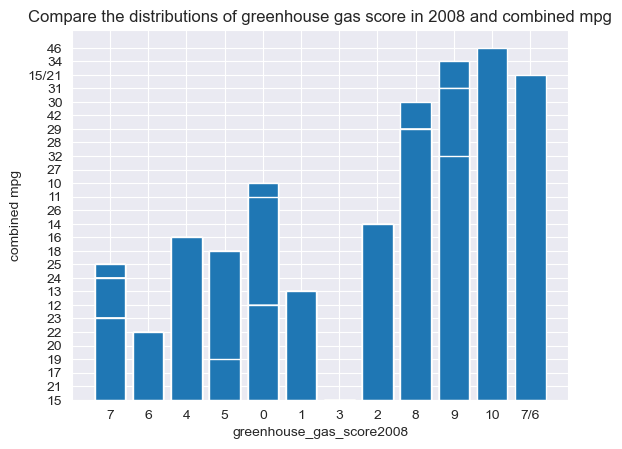

In [66]:
displa=df_08['greenhouse_gas_score']
mpg = df_08['cmb_mpg']
plt.bar(displa,mpg )
plt.title('Compare the distributions of greenhouse gas score in 2008 and combined mpg')
plt.xlabel('greenhouse_gas_score2008')
plt.ylabel('combined mpg');

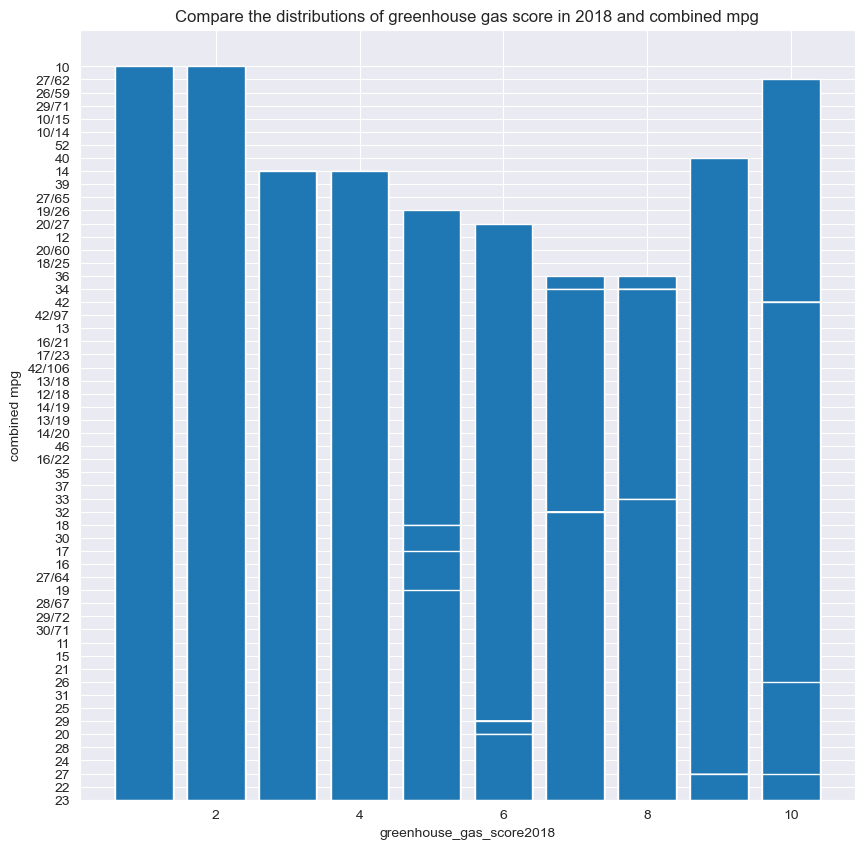

In [86]:
displa = df_18['greenhouse_gas_score']
mpg = df_18['cmb_mpg']

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

ax.bar(displa, mpg)
ax.set_title('Compare the distributions of greenhouse gas score in 2018 and combined mpg')
ax.set_xlabel('greenhouse_gas_score2018')
ax.set_ylabel('combined mpg')

plt.show()

#### 1- Are more unique models using alternative sources of fuel?

In [68]:
df_08.fuel.value_counts()

fuel
Gasoline       1004
ethanol           1
gas               1
CNG               1
ethanol/gas       1
Name: count, dtype: int64

In [69]:
df_18.fuel.value_counts()

fuel
Gasoline                763
Ethanol                  52
Ethanol/Gas              26
Diesel                   19
Gasoline/Electricity     12
Name: count, dtype: int64

In [70]:
alt_08=df_08.query('fuel in ["ethanol","CNG"]').model.nunique()
alt_08

2

In [71]:
alt_18=df_08.query('fuel in ["ethanol"]').model.nunique()
alt_18

1

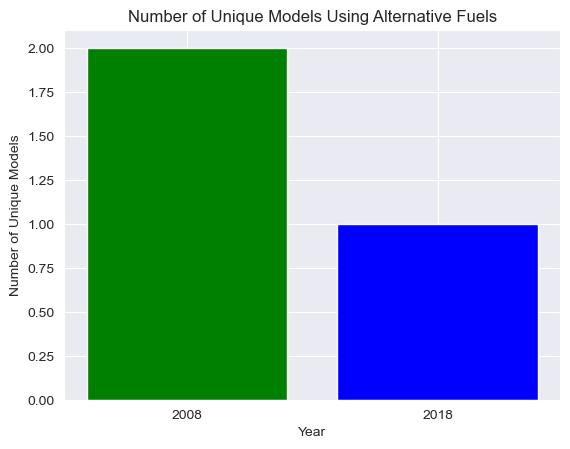

In [72]:
plt.bar(['2008','2018'],[alt_08,alt_18],color=['green','blue'])
plt.title("Number of Unique Models Using Alternative Fuels")
plt.xlabel("Year")
plt.ylabel("Number of Unique Models");

#### Since 2008, the number of unique models using alternative sources of fuel increased by 24. We can also look at proportions.

In [73]:
# total unique models each year
model_18=df_18['model'].nunique()
model_08=df_08['model'].nunique()
model_18 , model_08

(357, 377)

In [74]:
perc_model_08=alt_08/model_08
perc_model_18=alt_18/model_18
perc_model_08 , perc_model_18

(0.005305039787798408, 0.0028011204481792717)

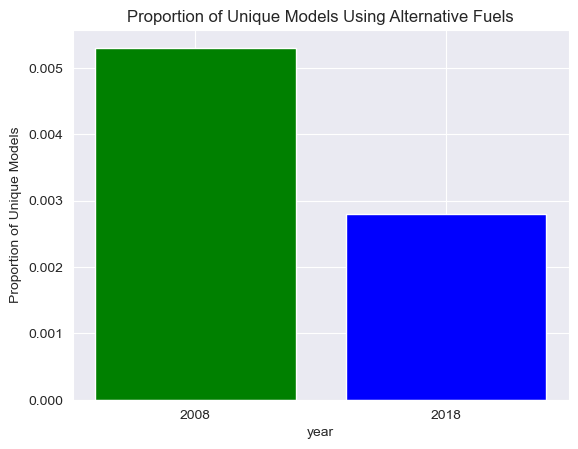

In [75]:
plt.bar(['2008','2018'],[perc_model_08,perc_model_18],color=['green','blue']);
plt.title('Proportion of Unique Models Using Alternative Fuels')
plt.xlabel('year')
plt.ylabel('Proportion of Unique Models');

### 2- How much have vehicle classes improved in fuel economy?

In [92]:
df_08['veh_class'].value_counts()

veh_class
small car        339
SUV              286
midsize car      140
pickup            90
station wagon     60
large car         55
van               21
minivan           17
Name: count, dtype: int64

In [98]:
df_08.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1008 entries, 0 to 1007
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   model                 1008 non-null   object 
 1   displ                 1008 non-null   float64
 2   cyl                   1008 non-null   int32  
 3   trans                 1008 non-null   object 
 4   drive                 1008 non-null   object 
 5   fuel                  1008 non-null   object 
 6   stnd                  1008 non-null   object 
 7   underhood_id          1008 non-null   object 
 8   veh_class             1008 non-null   object 
 9   air_pollution_score   1008 non-null   object 
 10  fe_calc_appr          1008 non-null   object 
 11  city_mpg              1008 non-null   object 
 12  hwy_mpg               1008 non-null   object 
 13  cmb_mpg               1008 non-null   object 
 14  unadj_cmb_mpg         1008 non-null   float64
 15  greenhouse_gas_score 